<a href="https://colab.research.google.com/github/nopimhra/Diabetes-patient-data-analysis/blob/main/analisisDataDiabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#pemanggilan library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sc

In [ ]:
#read dataset menggunakan library panda
data = pd.read_csv('/content/Dataset of Diabetes .csv')
data

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,200,454317,M,71,11.0,97,7.0,7.5,1.7,1.2,1.8,0.6,30.0,Y
996,671,876534,M,31,3.0,60,12.3,4.1,2.2,0.7,2.4,15.4,37.2,Y
997,669,87654,M,30,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.4,Y
998,99,24004,M,38,5.8,59,6.7,5.3,2.0,1.6,2.9,14.0,40.5,Y


In [ ]:
data['CLASS'].value_counts()

CLASS
Y     840
N     102
P      53
Y       4
N       1
Name: count, dtype: int64

In [ ]:
#hapus atribut inrelevan
data = data.drop(["ID"],axis=1)
data = data.drop(["No_Pation"],axis=1)
data.head()

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [ ]:
#cek data yang duplikat
duplicate_data = data[data.duplicated()]
print(duplicate_data)

    Gender  AGE  Urea  Cr  HbA1c  Chol   TG  HDL  LDL  VLDL   BMI CLASS
2        F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5  24.0     N
3        F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5  24.0     N
17       F   30   3.0  42    4.1   4.9  1.3  1.2  3.2   0.5  22.0     N
33       F   42   5.0  73    4.5   6.2  1.0  1.1  4.6   0.4  24.0     N
42       M   33   2.0  54    5.4   3.7  1.3  0.8  2.4   0.6  22.0     N
..     ...  ...   ...  ..    ...   ...  ...  ...  ...   ...   ...   ...
720      F   58   5.0  62    9.3   5.8  3.6  1.1  1.9   0.6  31.0     Y
726      F   58   4.3  56    9.1   4.4  2.0  1.0  2.5   0.9  29.0     Y
727      F   60   5.6  72    7.5   4.4  2.1  1.1  2.5   0.9  26.0     Y
740      F   52   4.7  34    9.9   5.1  4.5  0.6  2.7   2.0  26.0     Y
781      F   60   4.1  56   13.1   4.4  2.0  1.0  2.5   0.9  29.0     Y

[169 rows x 12 columns]


In [ ]:
#hapus data yang duplikat
data = data.drop_duplicates()
data

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
4,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N
5,F,45,2.3,24,4.0,2.9,1.0,1.0,1.5,0.4,21.0,N
6,F,50,2.0,50,4.0,3.6,1.3,0.9,2.1,0.6,24.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...
995,M,71,11.0,97,7.0,7.5,1.7,1.2,1.8,0.6,30.0,Y
996,M,31,3.0,60,12.3,4.1,2.2,0.7,2.4,15.4,37.2,Y
997,M,30,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.4,Y
998,M,38,5.8,59,6.7,5.3,2.0,1.6,2.9,14.0,40.5,Y


In [ ]:
#konversi tipe data
data['Urea'] = pd.to_numeric(data['Urea'])
data['Cr'] = pd.to_numeric(data['Cr'])
data['HbA1c'] = pd.to_numeric(data['HbA1c'])
data['Chol'] = pd.to_numeric(data['Chol'])
data['TG'] = pd.to_numeric(data['TG'])
data['HDL'] = pd.to_numeric(data['HDL'])
data['LDL'] = pd.to_numeric(data['LDL'])
data['VLDL'] = pd.to_numeric(data['VLDL'])
data['BMI'] = pd.to_numeric(data['BMI'])

data

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
4,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N
5,F,45,2.3,24,4.0,2.9,1.0,1.0,1.5,0.4,21.0,N
6,F,50,2.0,50,4.0,3.6,1.3,0.9,2.1,0.6,24.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...
995,M,71,11.0,97,7.0,7.5,1.7,1.2,1.8,0.6,30.0,Y
996,M,31,3.0,60,12.3,4.1,2.2,0.7,2.4,15.4,37.2,Y
997,M,30,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.4,Y
998,M,38,5.8,59,6.7,5.3,2.0,1.6,2.9,14.0,40.5,Y


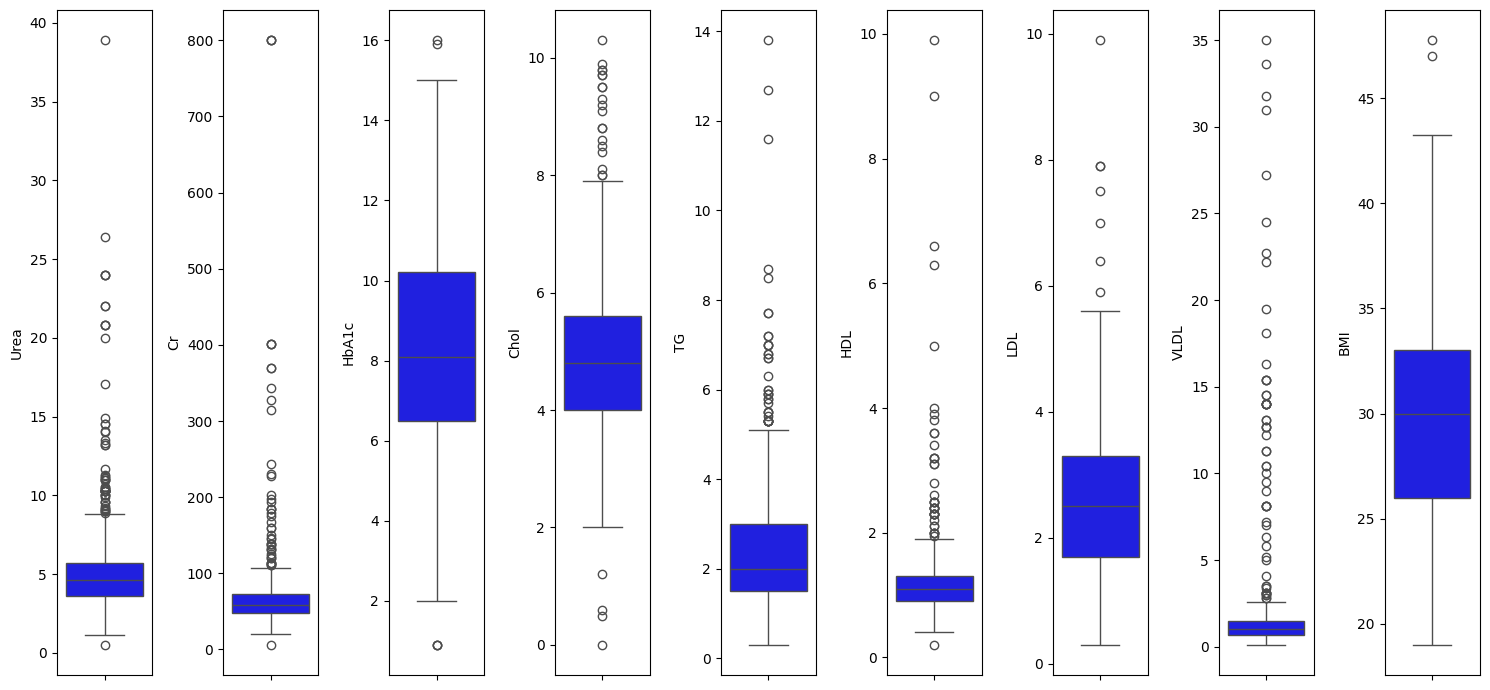

In [ ]:
#cek data outlier
finalFeatures =['Urea','Cr','HbA1c','Chol','TG','HDL','LDL','VLDL','BMI']
plt.figure(figsize=(15,7))
for i in range(0, len(finalFeatures)):
  plt.subplot(1, len(finalFeatures),i+1)
  sns.boxplot(y=data[finalFeatures[i]],color='blue', orient='v')
  plt.tight_layout()


In [ ]:
#handling outliers dengan metode capping
for i in range (0,len(finalFeatures)):
  q1=data[finalFeatures[i]].quantile(0.25)
  q2=data[finalFeatures[i]].quantile(0.75)
  iqr = q2-q1
  max_limit = q2 + (1.5*iqr)
  min_limit = q1 - (1.5*iqr)
  data[finalFeatures[i]] = pd.DataFrame(np.where(data[finalFeatures[i]]>max_limit,max_limit,
   (np.where(data[finalFeatures[i]]<min_limit,min_limit,data[finalFeatures[i]]))), columns=[finalFeatures[i]])


data.dropna(subset=finalFeatures, inplace=True)
print(data.shape)
data.to_csv("hasil_capping2.csv")





(662, 12)


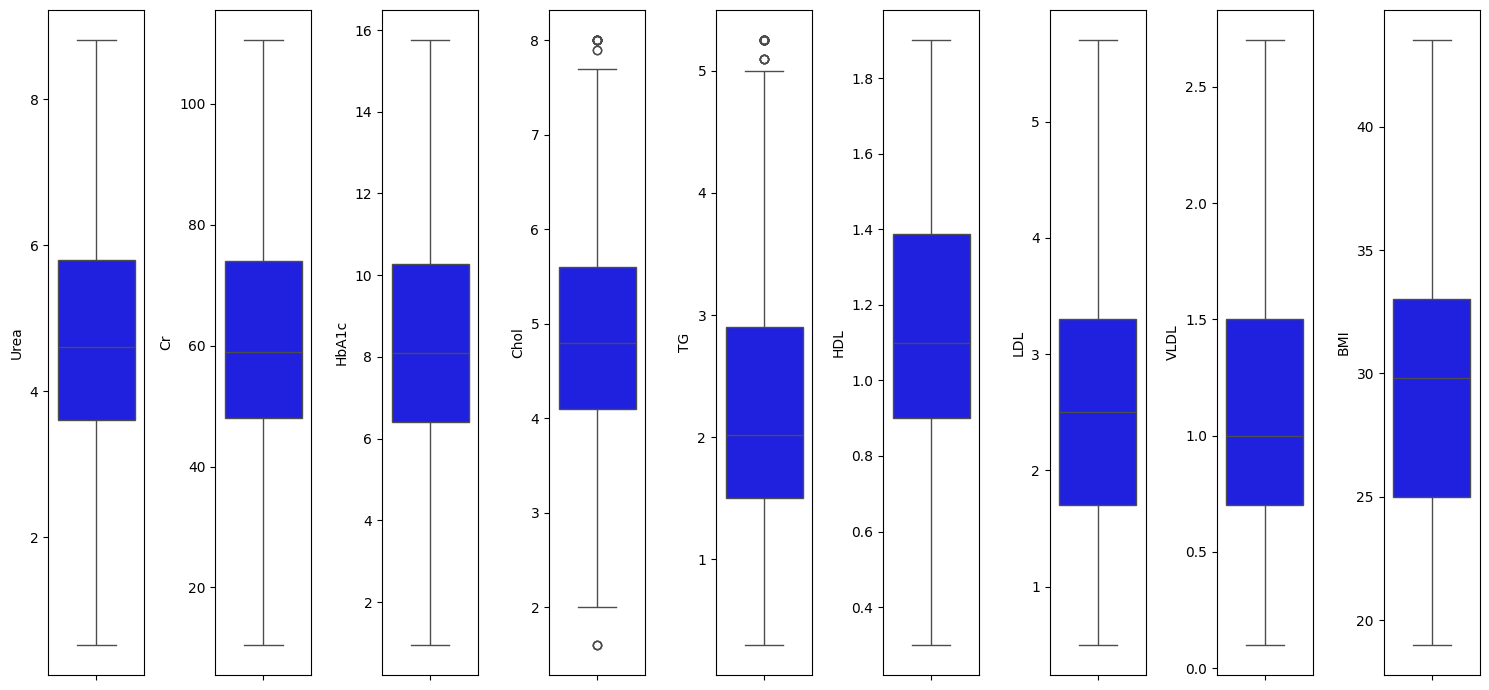

In [ ]:
plt.figure(figsize=(15,7))
for i in range(0, len(finalFeatures)):
  plt.subplot(1, len(finalFeatures),i+1)
  sns.boxplot(y=data[finalFeatures[i]],color='blue', orient='v')
  plt.tight_layout()

In [ ]:
#cek atribut yang memiliki nilai negatif
for a in range (len(finalFeatures)):
  print("terdapat value negatif pada atribut '{}' kolom :{}". format(finalFeatures[a],(data[finalFeatures[a]]<0).any()) )

terdapat value negatif pada atribut 'Urea' kolom :False
terdapat value negatif pada atribut 'Cr' kolom :False
terdapat value negatif pada atribut 'HbA1c' kolom :False
terdapat value negatif pada atribut 'Chol' kolom :False
terdapat value negatif pada atribut 'TG' kolom :False
terdapat value negatif pada atribut 'HDL' kolom :False
terdapat value negatif pada atribut 'LDL' kolom :False
terdapat value negatif pada atribut 'VLDL' kolom :False
terdapat value negatif pada atribut 'BMI' kolom :False


In [ ]:
#cek missin value
null= pd.DataFrame(data.isnull().sum(),columns=["Null value"])
null['%Missing Values'] = (data.isna().sum()/len(data)*100)
null = null[null['%Missing Values']>0]
null

,Null value,%Missing Values


In [ ]:
#analisis data
diabetes = data.loc[data["CLASS"] == "Y"]
potentially_diabetes = data.loc[data["CLASS"]!="N" ]

#analisis koefisien korelasi variabel
print("urea - glukosa {}".format(diabetes["Urea"].corr(diabetes["HbA1c"])))
print("Cr - glukosa {}". format(diabetes["Cr"].corr(diabetes["HbA1c"])))
print("Chol - glukosa {}".format(diabetes["Chol"].corr(diabetes["HbA1c"])))
print("TG - glukosa {}".format(diabetes["TG"].corr(diabetes["HbA1c"])))
print("HDL - glukosa {}".format(diabetes["HDL"].corr(diabetes["HbA1c"])))
print("LDL - glukosa{}".format(diabetes["LDL"].corr(diabetes["HbA1c"])))
print("VLDL - glukosa{}".format(diabetes["VLDL"].corr(diabetes["HbA1c"])))
print("BMI - glukosa{}".format(diabetes["BMI"].corr(diabetes["HbA1c"])))
print("")
#analisiss rata-rata usia pasien positif
print("rata rata usia pasien diabetes {}".format(potentially_diabetes["AGE"].mean()))
print("max usia pasien {}". format(max(potentially_diabetes["AGE"])))
print("min usia pasien {}".format(min(potentially_diabetes["AGE"])))
print("")

#persentase pengidap diabetes dan diprediktif diabetes berdasarkan usia 18-35
jumlah_pasien_by_age = potentially_diabetes["AGE"].between(18, 35).sum()
total_pasien= len(potentially_diabetes["AGE"])

print("persentase pengidap dan pasien bukan lansia {} %".format((jumlah_pasien_by_age/total_pasien)*100))


urea - glukosa -0.11111942377735083
Cr - glukosa -0.19283771597556215
Chol - glukosa 0.08880755117625695
TG - glukosa 0.11165016124874223
HDL - glukosa 0.013673843096139475
LDL - glukosa-0.01076555350715922
VLDL - glukosa0.10445158423791022
BMI - glukosa0.1743709385890313

rata rata usia pasien diabetes 54.76543209876543
max usia pasien 79
min usia pasien 28

persentase pengidap dan pasien bukan lansia 3.880070546737213 %


In [ ]:
# validasi missing value
data.isnull().sum()

Gender    0
AGE       0
Urea      0
Cr        0
HbA1c     0
Chol      0
TG        0
HDL       0
LDL       0
VLDL      0
BMI       0
CLASS     0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 662 entries, 0 to 830
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  662 non-null    object 
 1   AGE     662 non-null    int64  
 2   Urea    662 non-null    float64
 3   Cr      662 non-null    float64
 4   HbA1c   662 non-null    float64
 5   Chol    662 non-null    float64
 6   TG      662 non-null    float64
 7   HDL     662 non-null    float64
 8   LDL     662 non-null    float64
 9   VLDL    662 non-null    float64
 10  BMI     662 non-null    float64
 11  CLASS   662 non-null    object 
dtypes: float64(9), int64(1), object(2)
memory usage: 67.2+ KB


In [ ]:
data['Gender'].value_counts()

Gender
M    370
F    292
Name: count, dtype: int64

In [ ]:
# tranforming gender to numerik
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])

In [ ]:
data['Gender'].value_counts()

Gender
1    370
0    292
Name: count, dtype: int64

In [ ]:
data['CLASS'].value_counts()

CLASS
Y     526
N      95
P      40
N       1
Name: count, dtype: int64

In [ ]:
data['CLASS'] = label_encoder.fit_transform(data['CLASS'])

In [ ]:
data['CLASS'].value_counts()

CLASS
3    526
0     95
2     40
1      1
Name: count, dtype: int64

In [ ]:
data = data[data['CLASS'] != 1]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 661 entries, 0 to 830
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  661 non-null    int64  
 1   AGE     661 non-null    int64  
 2   Urea    661 non-null    float64
 3   Cr      661 non-null    float64
 4   HbA1c   661 non-null    float64
 5   Chol    661 non-null    float64
 6   TG      661 non-null    float64
 7   HDL     661 non-null    float64
 8   LDL     661 non-null    float64
 9   VLDL    661 non-null    float64
 10  BMI     661 non-null    float64
 11  CLASS   661 non-null    int64  
dtypes: float64(9), int64(3)
memory usage: 67.1 KB


In [ ]:
correlation = data.corr()
correlation['CLASS'].sort_values(ascending=False)

CLASS     1.000000
HbA1c     0.604729
BMI       0.594036
AGE       0.498281
TG        0.201838
Chol      0.197469
VLDL      0.175543
Gender    0.125452
Urea      0.116509
Cr        0.039568
HDL      -0.004462
LDL      -0.029423
Name: CLASS, dtype: float64

In [ ]:
# membagi dataset
from sklearn.model_selection import train_test_split

x = data.drop(['CLASS'],axis=1)
y = data['CLASS']

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
# melakukan optimal standarscaler
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_scale = sc.fit_transform(X_train)
X_test_scale = sc.fit_transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# model = LinearRegression()
model = DecisionTreeClassifier()
model.fit(X_train_scale,y_train)

DecisionTreeClassifier()

In [ ]:
model.score(X_train_scale,y_train)

1.0

In [ ]:
model.score(X_test_scale,y_test)

0.8646616541353384

In [ ]:
train_predict = model.predict(X_train_scale)
print(f"Akurasi train: {accuracy_score(y_train,train_predict)}")

Akurasi train: 1.0


In [ ]:
test_predict = model.predict(X_test_scale)
print(f"Akurasi tes: {accuracy_score(y_test,test_predict)}")

Akurasi tes: 0.8646616541353384


In [ ]:
y_test[:20]

800    3
379    3
156    3
631    3
96     0
706    3
435    3
330    3
78     0
794    3
195    3
87     0
767    3
664    3
708    3
749    3
60     0
289    3
266    3
560    3
Name: CLASS, dtype: int64

In [ ]:
print(f"Akurasi tes 20 data: {accuracy_score(y_test[:20],model.predict(X_test_scale[:20]))}")

Akurasi tes 20 data: 0.85
